**<h1>Importation des bibliothèques nécessaires </h1>**


In [1]:
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\pip\_vendor\urllib3\response.py", line 561, in read
    data = self._fp_read(amt) if not fp_closed else b""
           ^^^^^^^^^^^^^^^^^^
  File "C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\pip\_vendor\urllib3\response.py", line 527, in _fp_read
    return self._fp.read(amt) if amt is not None else self._fp.read()
           ^^^^^^^^^^^^^^^^^^
  File "C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312

Defaulting to user installation because normal site-packages is not writeable
  Using cached tensorflow-2.17.0-cp312-cp312-win_amd64.whl.metadata (3.2 kB)
  Using cached tensorflow_intel-2.17.0-cp312-cp312-win_amd64.whl.metadata (5.0 kB)
Using cached tensorflow-2.17.0-cp312-cp312-win_amd64.whl (2.0 kB)
   ---------------------------------------- 0.0/385.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/385.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/385.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/385.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/385.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/385.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/385.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/385.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/385.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/385.2 MB 

In [ ]:
# Import libraries
import tensorflow as tf  # Importation de TensorFlow pour construire et entraîner le modèle
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Générateur pour augmenter les images
from tensorflow.keras.models import Sequential  # Pour créer un modèle séquentiel
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout  # Couches de réseau de neurones pour CNN
from tensorflow.keras.optimizers import Adam  # Optimiseur Adam pour l'entraînement
import os  # Module pour les opérations de fichiers et de chemin

 **<h1>Data Augmentation and Loading</h1>**

In [2]:
# Définition des chemins vers les répertoires de données
train_dir = r'C:\Users\Usuario\Desktop\CNN\plant data\Train'           # Chemin vers les images d'entraînement
test_dir = r'C:\Users\Usuario\Desktop\CNN\plant data\Test'             # Chemin vers les images de test
validation_dir = r'C:\Users\Usuario\Desktop\CNN\plant data\Validation' # Chemin vers les images de validation

In [4]:
# Augmentation des données pour améliorer la robustesse du modèle
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Mise à l'échelle des pixels entre 0 et 1
    rotation_range=20,  # Rotation des images de 20 degrés
    width_shift_range=0.2,  # Décalage horizontal des images
    height_shift_range=0.2,  # Décalage vertical des images
    shear_range=0.2,  # Transformation par cisaillement
    zoom_range=0.2,  # Zoom sur les images
    horizontal_flip=True,  # Flip horizontal des images
    fill_mode='nearest'  # Remplissage des pixels manquants par les plus proches
)

In [5]:
# Réduction des images de test uniquement
test_datagen = ImageDataGenerator(rescale=1./255)

In [6]:
# Générateur de données pour les images d'entraînement
train_generator = train_datagen.flow_from_directory(
    train_dir,  # Répertoire contenant les images d'entraînement
    target_size=(150, 150),  # Redimensionnement des images à 150x150 pixels
    batch_size=32,  # Taille du lot
    class_mode='binary'  # Classification binaire
)

Found 1322 images belonging to 3 classes.


In [8]:
# Chargement et prétraitement des données de test
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'  # Classification avec plusieurs classes (3 catégories dans ce cas)
)

Found 150 images belonging to 3 classes.


In [9]:
# Chargement et prétraitement des données de validation
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'  # Classification avec plusieurs classes
)


Found 60 images belonging to 3 classes.


**<h1>Build the CNN Model </h1>**

In [10]:
# Définition du modèle CNN séquentiel
model = Sequential()

# Ajout des couches convolutionnelles et de pooling pour extraire les caractéristiques des images
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))  # Première couche convolutionnelle
model.add(MaxPooling2D(2, 2))  # Couche de pooling pour réduire la taille des images

model.add(Conv2D(64, (3, 3), activation='relu'))  # Deuxième couche convolutionnelle avec plus de filtres
model.add(MaxPooling2D(2, 2))  # Deuxième couche de pooling

model.add(Conv2D(128, (3, 3), activation='relu'))  # Troisième couche convolutionnelle
model.add(MaxPooling2D(2, 2))  # Troisième couche de pooling

model.add(Conv2D(128, (3, 3), activation='relu'))  # Quatrième couche convolutionnelle
model.add(MaxPooling2D(2, 2))  # Quatrième couche de pooling

model.add(Flatten())  # Aplatissement des caractéristiques pour les connecter aux couches denses
model.add(Dense(512, activation='relu'))  # Couche dense avec 512 neurones
model.add(Dropout(0.5))  # Dropout pour éviter le surapprentissage
model.add(Dense(3, activation='softmax'))  # Couche de sortie avec 3 classes : sain, oïdium, rouille


c:\Users\Usuario\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:

# Compilation du modèle avec la fonction de perte, l'optimiseur et les métriques
model.compile(
    loss='categorical_crossentropy',  # Perte pour les problèmes de classification multiple
    optimizer=Adam(learning_rate=0.001),  # Utilisation de l'optimiseur Adam avec un taux d'apprentissage
    metrics=['accuracy']  # Mesure de la précision du modèle
)


In [12]:
# Affichage du résumé du modèle
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,454,147 (13.18 MB)

 Trainable params: 3,454,147 (13.18 MB)

 Non-trainable params: 0 (0.00 B)

**<h1>Entraînement du modèle</h1>**

In [13]:
# Entraînement du modèle en utilisant les données d'entraînement et de validation
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,  # Nombre d'étapes par époque
    epochs=20,  # Nombre d'époques
    validation_data=validation_generator,  # Données de validation
    validation_steps=validation_generator.samples // validation_generator.batch_size  # Nombre d'étapes pour la validation
)

Epoch 1/20


c:\Users\Usuario\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 755s 16s/step - accuracy: 0.3988 - loss: 1.0923 - val_accuracy: 0.6562 - val_loss: 0.7813
Epoch 2/20
 1/41 ━━━━━━━━━━━━━━━━━━━━ 2:42 4s/step - accuracy: 0.4688 - loss: 0.9295

c:\Users\Usuario\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


41/41 ━━━━━━━━━━━━━━━━━━━━ 17s 314ms/step - accuracy: 0.4688 - loss: 0.9295 - val_accuracy: 0.7143 - val_loss: 0.7215
Epoch 3/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 919s 18s/step - accuracy: 0.6723 - loss: 0.6961
Epoch 4/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - accuracy: 0.7812 - loss: 0.4716 - val_accuracy: 0.7188 - val_loss: 0.6417
Epoch 5/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 918s 19s/step - accuracy: 0.8347 - loss: 0.4369 - val_accuracy: 0.9643 - val_loss: 0.2253
Epoch 6/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.8438 - loss: 0.5314
Epoch 7/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 956s 17s/step - accuracy: 0.9093 - loss: 0.2594 - val_accuracy: 0.9062 - val_loss: 0.1987
Epoch 8/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 13s 258ms/step - accuracy: 1.0000 - loss: 0.1294 - val_accuracy: 0.8214 - val_loss: 0.3991
Epoch 9/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 736s 13s/step - accuracy: 0.9116 - loss: 0.2584
Epoch 10/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 13s 277ms/step - accuracy: 0.9688 - loss: 0.1399 - val_accuracy: 0.9375 - v

**<h1>Évaluation du modèle</h1>**

In [14]:
# Évaluation du modèle sur les données de test
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc * 100:.2f}%')

5/5 ━━━━━━━━━━━━━━━━━━━━ 52s 10s/step - accuracy: 0.9217 - loss: 0.3011
Test accuracy: 92.00%


**<h1> Sauvegarde du modèle</h1>**

In [15]:
# Sauvegarde du modèle entraîné pour une utilisation future
model.save('plant_disease_classification_model.keras')

**<h1>Visualisation des résultats de l'entraînement</h1>**

In [16]:
import matplotlib.pyplot as plt

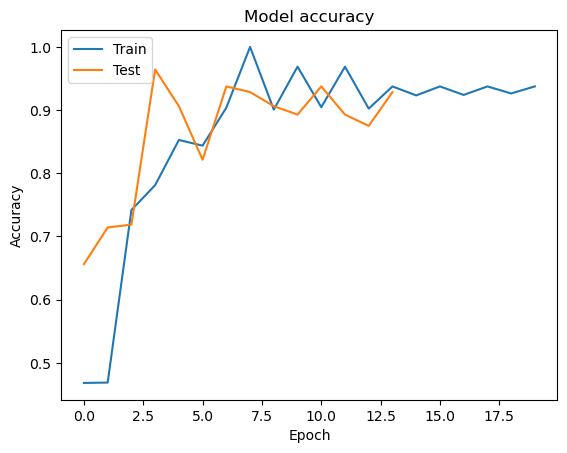

In [17]:
# Visualisation de la précision du modèle pendant l'entraînement et la validation
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

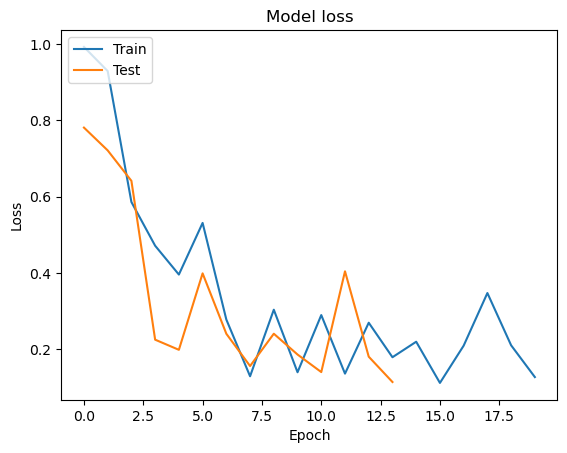

In [18]:
# Visualisation de la perte du modèle pendant l'entraînement et la validation
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

**Création d'un système prédictif**

In [19]:

# Fonction pour charger et prétraiter une image en utilisant Pillow
def load_and_preprocess_image(image_path, target_size=(150, 150)):
    img = Image.open(image_path)
    img = img.resize(target_size)
    img_array = np.array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array.astype('float32') / 255.0  # Normalisation des valeurs des pixels
    return img_array
# Fonction pour prédire la classe d'une image donnée
def predict_image_class(model, image_path, class_indices):
    preprocessed_img = load_and_preprocess_image(image_path)
    predictions = model.predict(preprocessed_img)  # Prédiction du modèle
    predicted_class_index = np.argmax(predictions, axis=1)[0]  # Index de la classe prédite
    predicted_class_name = class_indices[predicted_class_index]  # Nom de la classe prédite
    return predicted_class_name